<a href="https://colab.research.google.com/github/anumit-web/ML-Analytics-Portfolio-2024-DEV-ENV/blob/main/8.%20Market%20Basket%20Analysis/Market_Basket_Analysis_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence
# Machine Learning
# Portfolio Project
# #8
# Market Basket Analysis
# Goal = Conduct market basket analysis to identify product associations and customer buying patterns.

# unsupervised learning

# find what item a customer is most likely to buy based on information about customer purchase history data

# Apriori algorithm
## a machine learning algorithm used to find frequent itemsets and association rules in data

# Identify frequent items
## identifying the most frequent individual items in the data

# Association rules
## a rule might say that if items A and B are in a transaction, then item C is likely to be included as well

## The Apriori algorithm uses the insight that adding items to a frequently purchased group can only make it less frequent.

## The algorithm requires two important parameters: minimum support and minimum confidence

# support
## Support basically refers to the number of times the chosen item/s appears in the database

# Confidence
## Confidence refers to the frequency of A and B being together, given the number of times A has occurred.

# Lift
## the likelihood of the itemset B being purchased when item A is purchased while taking into account the support of B

# Market Basket Analysis
## customers who buy a certain item (or group of items) are more likely to buy another specific item (or group of items)

## The relations hence can be used to increase profitability through cross-selling, recommendations, promotions, or even the placement of items on a menu or in a store.


# https://en.wikipedia.org/wiki/Apriori_algorithm

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


# Branding statement

In [54]:
# https://i.ibb.co/zZswY34/Pink-hands-network-2.png

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


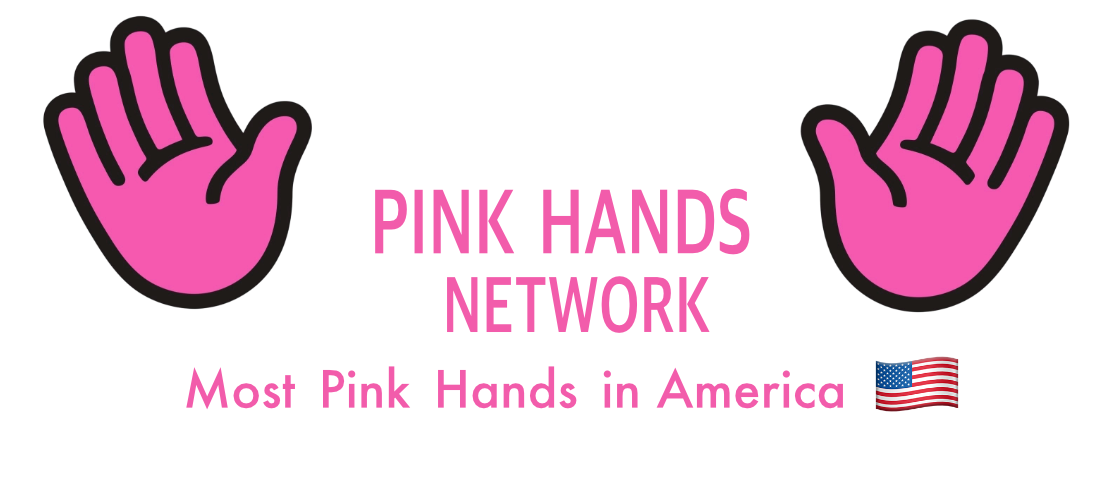

In [55]:
from IPython.display import Image
Image('https://i.ibb.co/zZswY34/Pink-hands-network-2.png')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# EDA, Exploratory Data Analysis

## import libraries

In [56]:
print('Hello, Market Basket Analysis')

Hello, Market Basket Analysis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [57]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [58]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


## Input data

In [59]:
#

input_data_df = pd.read_csv("https://zenodo.org/records/13898853/files/Groceries_dataset.csv",
                            sep = ',')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [60]:
number_of_rows = input_data_df.shape[0]
number_of_columns = input_data_df.shape[1]
print("Numner of rows = ", number_of_rows)
print("Number of columns = ", number_of_columns)

Numner of rows =  38765
Number of columns =  3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [61]:

input_data_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [62]:
input_data_df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [63]:
input_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [64]:
input_data_df.describe()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


print column names

In [65]:
print(input_data_df.columns)

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [66]:
# Get all Column Header Labels as List
for column_headers in  input_data_df.columns:
    print(column_headers)

Member_number
Date
itemDescription


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


## find list of all columns which have null values
using SKIMPY

In [67]:
# Get the count of null values in each column
null_counts = input_data_df.isnull().sum()
print('Priniting count of null values = ')
print(null_counts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


Priniting count of null values = 
Member_number      0
Date               0
itemDescription    0
dtype: int64


In [68]:
try:
  import skimpy
except:
  !pip install skimpy
  import skimpy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [69]:
# ! pip install skimpy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [70]:
from skimpy import skim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [71]:
skim(input_data_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 38765  │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Member_number      │    0 │      0 │   3004 │   1154 │   1000 │   2002 │   3005 │   4007 │  5000 │ ▇▇▇▇▇▇  │  │
│ └────────────────────┴──────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA     ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Date                            │      0 │          0 │                          1 │                 38765 │  │
│ │ itemDescription                 │      0 │          0 │                        1.6 │                 61681 │  │
│ └─────────────────────────────────┴────────┴────────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## find unique values by column names

In [72]:
# Find the number of unique values in both 'Name' and 'Age' columns
unique_values = input_data_df.nunique()
print(unique_values)

Member_number      3898
Date                728
itemDescription     167
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [73]:
try:
  import summarytools
except:
  !pip install summarytools
  import summarytools

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [74]:
# ! pip install summarytools

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [75]:
from summarytools import dfSummary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [76]:
dfSummary(input_data_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Member_number[int64],Mean (sd) : 3003.6 (1153.6)min < med < max:1000.0 < 3005.0 < 5000.0IQR (CV) : 2005.0 (2.6),"3,898 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACbUlEQVR4nO3ZvY7aQBSG4TP8GrBsIRLoaFJGSkHJReRicwmLxBVQpElFh4SQEc5aGEOaTaQ0C/bsrvnQ+9Qcz8h+GbNad7lcDLh3jbo3ANyiVfcG8D/nXM/MOh6XOF4ul+e32s+9eNhQFR+4c643Go2+R1E0rHqN/X6/c879qLL3e75nDxlq3Q/cQyeKouF8Pn+O4zgrO5wkSbBcLofb7bZjZqX2fe/37Gqont+yhpmdK876zEdhGI7n8/m+6gNfLBbj7Xb7yTm3r7C+18kSx3E2Ho9/V5ktiiIys8g5V3b0ru/Zq6H6fMuKominafolDMNfjUYj/8j5PM+Doii+drvdpyoPPE3Tdp7n36bTabPZbJZ+aDWdxl77vvd7du1ErfwqWq/Xw9Vq9Xk2m/2cTCa7MrO+8y+z/dPp1Cy7rpnZ8XhsBUHQn81mWdm1PU+W6Hw+t0vO/OOz77rv2bWfLDf9Rq3yKtrtdj0zs8FgUOk15jP/d9ZXlbXf4lTLsuzJzCq9+s307tmLV9d/yD+m6lTnqfbICPWd1HmqPSL+MwUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJrVs+lCRJUPbCh8MhMDNL0zTYbDb9j5xXXVt1377zt/T1BwJWh48MK17IAAAAAElFTkSuQmCC"">",0(0.0%)
2,Date[object],1. 21-01-20152. 21-07-20153. 29-11-20154. 08-08-20155. 30-04-20156. 28-08-20147. 26-03-20158. 30-09-20159. 19-06-201510. 16-05-201511. other,"96 (0.2%)93 (0.2%)92 (0.2%)92 (0.2%)91 (0.2%)88 (0.2%)88 (0.2%)87 (0.2%)85 (0.2%)85 (0.2%)37,868 (97.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaklEQVR4nO3cQUocYRRG0VfSGJ10I4JLSPbgIrLYLKIXkT2IWINonHQGIiQhs5Bb0Dln1rN/cOEh1OdyOp0GChdbP4D/h9jIiI2M2MiIjYzYyIiNjNjIiI2M2MhcLMvyaVmWq60fwvm7mJmPM/Nh64dw/pxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNzMTNfZ+b71g/h/C3+ixEVZ5SM2MhYV5GxriLjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJSM2MgYvZAxeyDijZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcUbJiI2M2MhYV5GxriLjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuImNdRcYZJSM2MgYvZAxeyDijZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcUbJiI2MwQsZgxcyzigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuImNdRcYZJSM2MtZVZKyryDijZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcUbJiI2MwQsZgxcyzigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzIGL2ScUTJiIyM2MtZVZKyryDijZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkrKvIWFeRcUbJiI2MwQsZgxcyzigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzIGL2ScUTLLzFzPzOXWD+EsvZ5Op+f3H7vb29vP+/3+ZssXcZ7WdX1cluXLe3C7/X5/c39//3w4HF62fhzn4+np6ep4PN48PDxczsxbbDMzh8Ph5e7u7tumr+McXf/8wx8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZHYzb5+DbP0Qzsufmtqt6/p4PB5v5rfPQeBvrev6ODOv7799Fs6/9Mtn4dZVZPyBQEZsZMRGRmxkxEZGbGTERkZsZMRG5geWtG4kbAREDwAAAABJRU5ErkJggg=="">",0(0.0%)
3,itemDescription[object],1. whole milk2. other vegetables3. rolls/buns4. soda5. yogurt6. root vegetables7. tropical fruit8. bottled water9. sausage10. citrus fruit11. other,"2,502 (6.5%)1,898 (4.9%)1,716 (4.4%)1,514 (3.9%)1,334 (3.4%)1,071 (2.8%)1,032 (2.7%)933 (2.4%)924 (2.4%)812 (2.1%)25,029 (64.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEIElEQVR4nO3dTWpbVwCG4aMgTDORMAYvRovoYrsI7cYYa1CHTNRB01JVf8bc+yoozzMLVUDQlyN0OV+02O/3Awpfbv0G+HWIjYzYyIiNjNjIiI2M2MiIjYzYyCzGGF/HGA8feO33/X7/PvP74Y4tn56efl+tVo/XXrjb7V4Xi8UfguOzlqvV6nGz2byv1+tv51709vb223a7fXx5eXkYY4iNT1mOMcZ6vf72/Pz855XXfg3eD3fMFwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiOzHOPv+2qXXnTtv8NHLHe73et2u30cV+6r7Xa71zHG9+ZtcY9sEMgs/JNZVD5ysjnRmMTVdZVVFVO5uK6yqmJKH1lXWVUxCQ91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFwcvBi6MKWrgxdDF6biWjgZgxcy1042pxqTuTh4MXZhSmcHL8YuTO3a4MXYhcl4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbm7OD

# Data Processing

## convert date column to date data type



In [77]:
# print
input_data_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [78]:
input_data_df["Date"]=pd.to_datetime(input_data_df["Date"])

# input_data_df["Date"] = pd.to_datetime(input_data_df["Date"], format='%d.%m.%Y %H:%M')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):
<ipython-input-78-02d313c84c1a>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  input_data_df["Date"]=pd.to_datetime(input_data_df["Date"])


In [79]:
input_data_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [80]:
input_data_df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,0
Member_number,int64
Date,datetime64[ns]
itemDescription,object


In [81]:
input_data_df['itemDescription'] = input_data_df['itemDescription'].apply(str)

# Change the 'Age' column type to float
# input_data_df['Price'] = pd.to_numeric(input_data_df['Price'], downcast='float')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [82]:
input_data_df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,0
Member_number,int64
Date,datetime64[ns]
itemDescription,object


In [83]:
input_data_df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,0
Member_number,int64
Date,datetime64[ns]
itemDescription,object


## find missing values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


<Axes: >

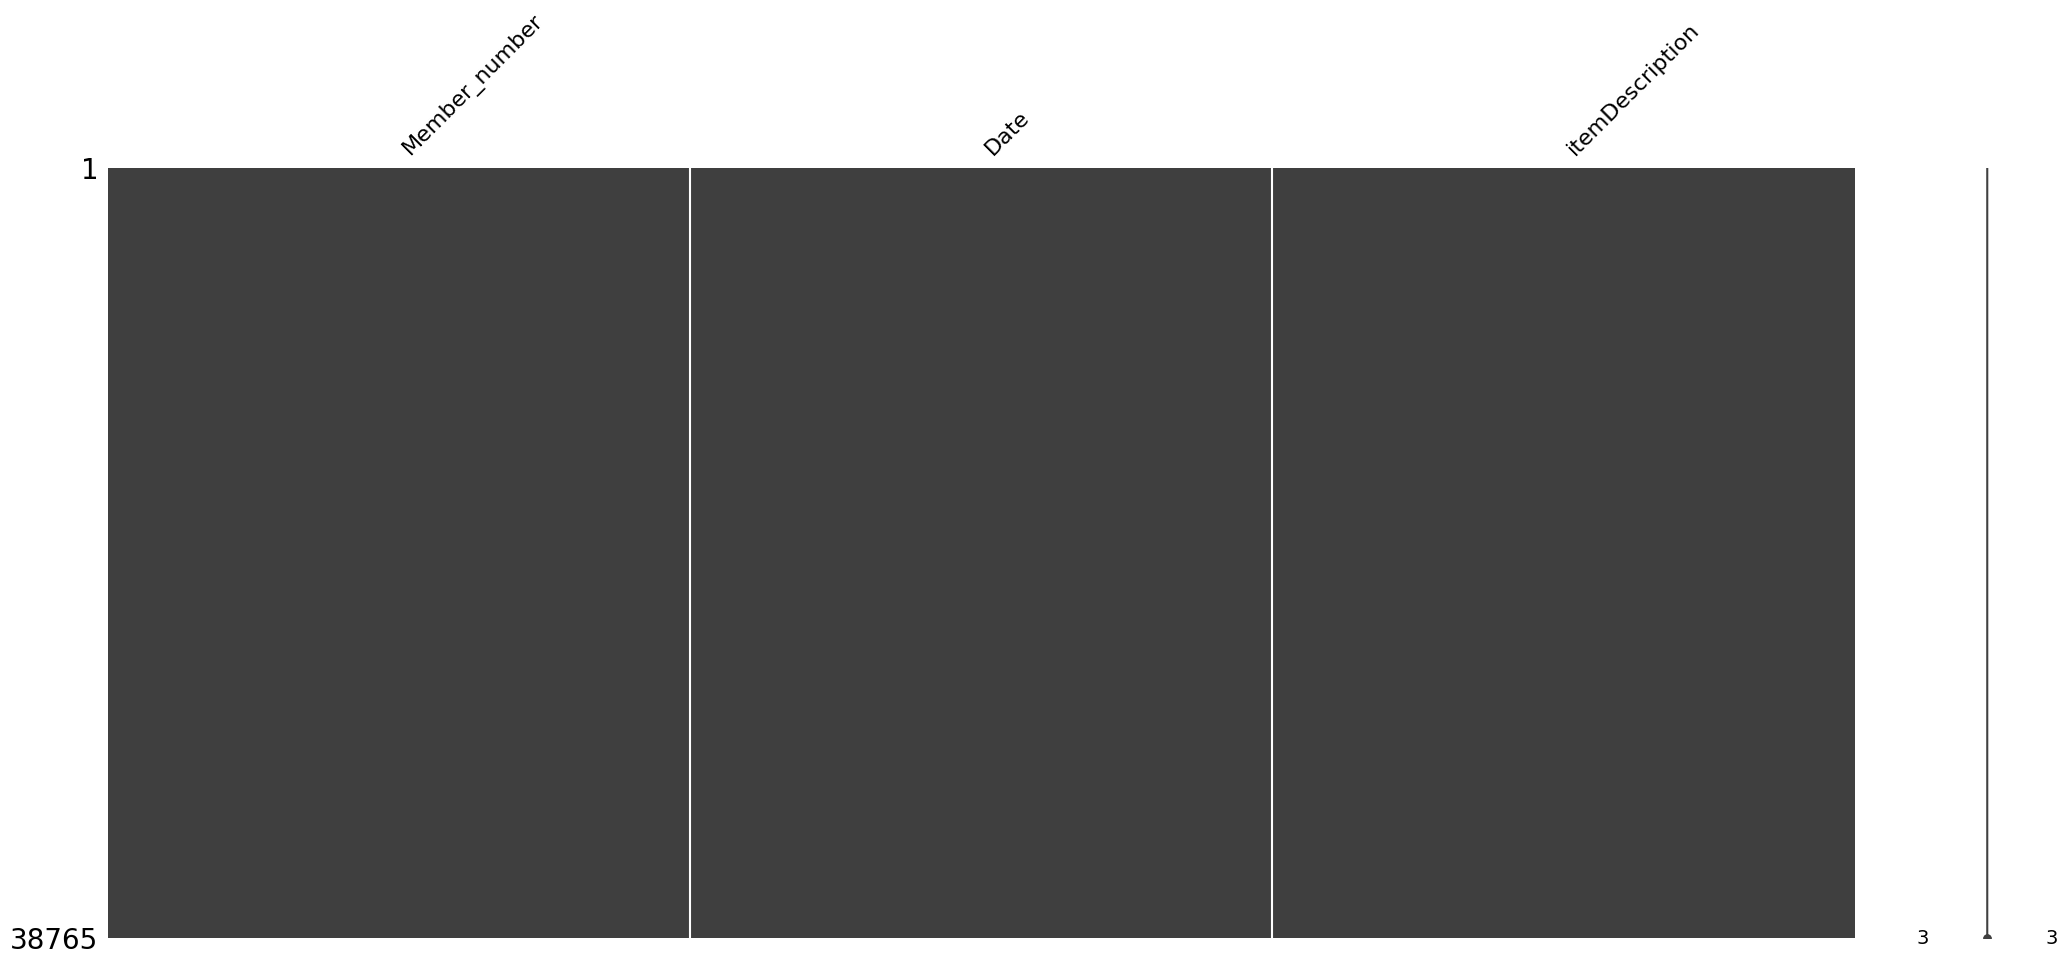

In [84]:
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(input_data_df)

In [85]:
# exit(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


change index to date tyoe and date column

In [86]:
input_data_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


# Data Visualization 📊📈📉

## Top 20 products sold


In [87]:
product_counts = input_data_df["itemDescription"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [88]:
product_counts.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,count
itemDescription,
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
root vegetables,1071
tropical fruit,1032
bottled water,933
sausage,924


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


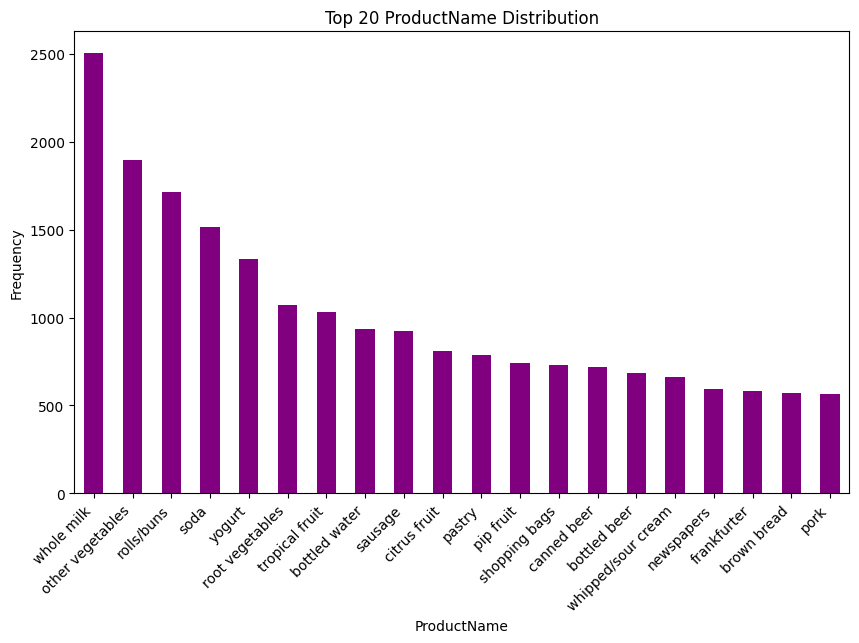

In [89]:
product_counts.head(20).plot(kind='bar', figsize=(10, 6), color="purple")
plt.title('Top 20 ProductName Distribution')
plt.xlabel('ProductName')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [90]:
# exit(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


# Data Calculations

## unsupervised learning

find what item a customer is most likely to buy based on information about customer purchase history data

## Apriori algorithm

a machine learning algorithm used to find frequent itemsets and association rules in data

## Identify frequent items

identifying the most frequent individual items in the data

## Association rules

a rule might say that if items A and B are in a transaction, then item C is likely to be included as well

The Apriori algorithm uses the insight that adding items to a frequently purchased group can only make it less frequent.

The algorithm requires two important parameters: minimum support and minimum confidence

## 1. Support

Support basically refers to the number of times the chosen item/s appears in the database

## 2. Confidence

Confidence refers to the frequency of A and B being together, given the number of times A has occurred.

## 3. Lift

the likelihood of the itemset B being purchased when item A is purchased while taking into account the support of B

## Market Basket Analysis

customers who buy a certain item (or group of items) are more likely to buy another specific item (or group of items)

The relations hence can be used to increase profitability through cross-selling, recommendations, promotions, or even the placement of items on a menu or in a store.

https://en.wikipedia.org/wiki/Apriori_algorithm

## convert dataframe another dataframe where each row is a transaction

In [91]:
processed_data_df = input_data_df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [92]:
processed_data_df['itemDescription'] = processed_data_df['itemDescription'].transform(lambda x: [x])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [93]:
processed_data_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,Member_number,Date,itemDescription
0,1808,2015-07-21,[tropical fruit]
1,2552,2015-01-05,[whole milk]
2,2300,2015-09-19,[pip fruit]
3,1187,2015-12-12,[other vegetables]
4,3037,2015-02-01,[whole milk]


In [94]:
processed_data_df = processed_data_df.groupby(['Member_number','Date']).sum()['itemDescription'].reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [95]:
processed_data_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,itemDescription
0,"[whole milk, pastry, salty snack]"
1,"[sausage, whole milk, semi-finished bread, yog..."
2,"[soda, pickled vegetables]"
3,"[canned beer, misc. beverages]"
4,"[sausage, hygiene articles]"


In [96]:
processed_data_df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,itemDescription
14958,"[butter milk, whipped/sour cream]"
14959,"[bottled water, herbs]"
14960,"[fruit/vegetable juice, onions]"
14961,"[bottled beer, other vegetables]"
14962,"[soda, root vegetables, semi-finished bread]"


In [97]:
encoder = TransactionEncoder()
transactions = pd.DataFrame(encoder.fit(processed_data_df).transform(processed_data_df), columns=encoder.columns_)

transactions.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [98]:
frequent_itemsets_df = apriori(transactions, min_support= 6/len(processed_data_df), use_colnames=True, max_len = 2)


frequent_itemsets_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)


In [99]:
rules_df = association_rules(frequent_itemsets_df, metric="lift",  min_threshold = 1.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


In [100]:
rules_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(butter milk),0.021386,0.017577,0.000601,0.028125,1.600131,0.000226,1.010854,0.383247
1,(butter milk),(UHT-milk),0.017577,0.021386,0.000601,0.034221,1.600131,0.000226,1.013289,0.381761
2,(UHT-milk),(cream cheese ),0.021386,0.023658,0.000869,0.040625,1.717152,0.000363,1.017685,0.426767
3,(cream cheese ),(UHT-milk),0.023658,0.021386,0.000869,0.036723,1.717152,0.000363,1.015922,0.427761
4,(artif. sweetener),(soda),0.001938,0.097106,0.000468,0.241379,2.485725,0.000280,1.190178,0.598864


In [101]:
processed_data_df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,itemDescription
14958,"[butter milk, whipped/sour cream]"
14959,"[bottled water, herbs]"
14960,"[fruit/vegetable juice, onions]"
14961,"[bottled beer, other vegetables]"
14962,"[soda, root vegetables, semi-finished bread]"


## Business Application

### whole milk

find items wnich drive sales of whole milk

In [102]:
milk_rules_df = rules_df[rules_df['consequents'].astype(str).str.contains('whole milk')]
milk_rules_df = milk_rules_df.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

milk_rules_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957,0.539750
1,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523,0.461695
2,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,0.447899
3,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908,0.447899
4,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868,0.428360


In [103]:
raise SystemExit("Stop right there!")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  def _forward_input(self, allow_stdin=False):


SystemExit: Stop right there!

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# The End 🛑